<h1> Student Success Prediction using Machine learning</h>

1. **Forward Feature Selection**:

   * **Approach**: Starts with no features, and then iteratively adds the best feature that improves model performance at each step.
   * **Process**: At each step, the algorithm considers all features and selects the one that improves the model the most.
   * **Use Case**: Ideal when you want to start with a minimal set of features and progressively add features that enhance the model's accuracy.

2. **Backward Feature Selection**:

   * **Approach**: Starts with all features and iteratively removes the least useful feature at each step.
   * **Process**: At each step, the algorithm evaluates the model performance by removing one feature and selects the least significant feature to remove.
   * **Use Case**: Useful when you start with a large set of features and want to eliminate irrelevant ones.

3. **Exhaustive Feature Selection**:

   * **Approach**: Evaluates every possible combination of features.
   * **Process**: The algorithm tests all possible subsets of features and selects the one that yields the best model performance.
   * **Use Case**: It provides the most accurate result but is computationally expensive, especially when the number of features is large.

4. **Recursive Feature Selection**:

   * **Approach**: Uses a machine learning model to evaluate the importance of features and selects the most important ones recursively.
   * **Process**: It fits the model multiple times, removing the least important features after each iteration.
   * **Use Case**: Works well with algorithms that can compute feature importance, like decision trees or random forests. It is a popular and efficient method for feature selection.

Each technique has its strengths, and the choice depends on the size of your dataset, computational resources, and the nature of the features you're working with.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,learning_curve, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import auc,confusion_matrix, roc_curve, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

### Read the dataset

In [ ]:
data = pd.read_csv("dataset.csv", sep=";")

In [ ]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
data.shape

(4424, 35)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
data.describe(include="all")

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


### check if the dataset has null values

In [ ]:
data.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


### Count the number of every class in the output

<ipython-input-19-5df8f3be2699>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.Target, palette="bwr")


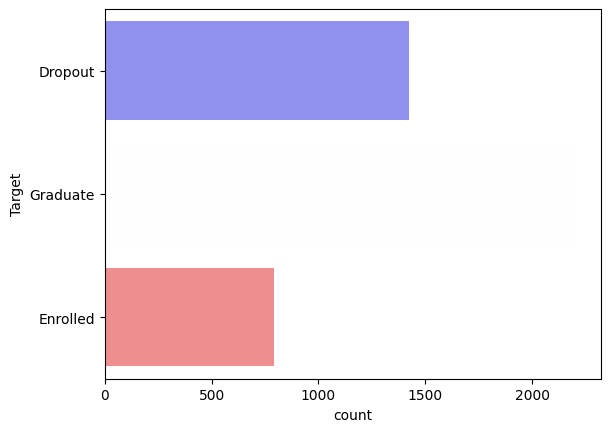

,proportion
Target,
Graduate,0.499322
Dropout,0.321203
Enrolled,0.179476


In [ ]:
sns.countplot(data.Target, palette="bwr")
plt.show()
data.Target.value_counts(normalize=True)

## Convert Dropout =0, Graduate=1, Enrolled=3

In [ ]:
data = pd.read_csv("dataset.csv", sep=";")
data["Target"]=data.Target.map(dict( Dropout =0, Graduate=1, Enrolled=2))

### select only Dropout and Graduate because the number of Enrolled students is very low

In [ ]:
data = data[data['Target'] != 2]

### Read the input and the output

In [ ]:
X = data.drop("Target",axis=1)
y = data["Target"]

In [ ]:
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,6,1,11,1,1,1,1,3,4,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,5,1,1,1,22,27,10,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,8,2,15,1,1,1,23,27,6,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,12,1,3,0,1,1,22,28,10,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [ ]:
y.head()

,Target
0,0
1,1
2,0
3,1
4,1


## Data scaling

In [ ]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit_transform(X)

## Data splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

## Build models

In [ ]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
rf_3 = RandomForestClassifier()
rfe = RFE(estimator=rf_3, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, y_train)
y_pred=rfe.predict(X_test)

              precision    recall  f1-score   support

           0     0.9330    0.8531    0.8913       245
           1     0.9283    0.9688    0.9481       481

    accuracy                         0.9298       726
   macro avg     0.9307    0.9109    0.9197       726
weighted avg     0.9299    0.9298    0.9289       726



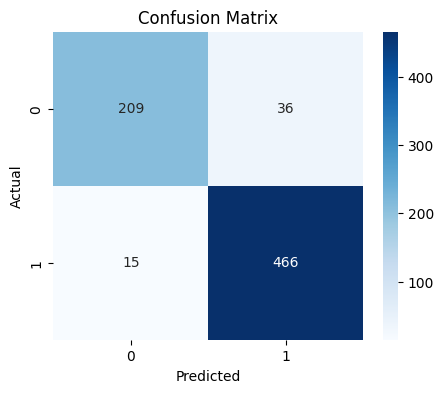

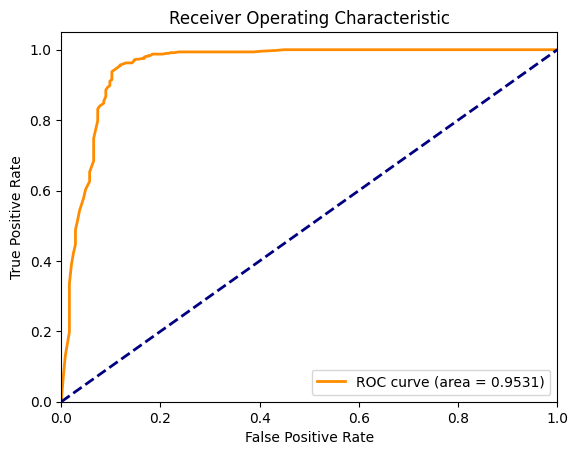

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Draw the roc curev and auc using the results of random forest
# ROC Curve and AUC
y_pred_proba = rfe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV


eclf = VotingClassifier(estimators=[
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression()),
    ], voting='soft')


eclf.fit(X_train,y_train)


y_pred=eclf.predict(X_test)

              precision    recall  f1-score   support

           0     0.9417    0.8571    0.8974       245
           1     0.9304    0.9730    0.9512       481

    accuracy                         0.9339       726
   macro avg     0.9361    0.9151    0.9243       726
weighted avg     0.9342    0.9339    0.9331       726



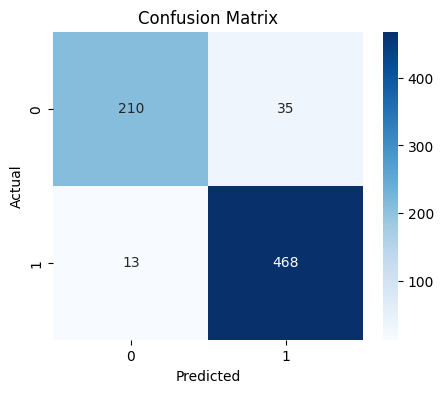

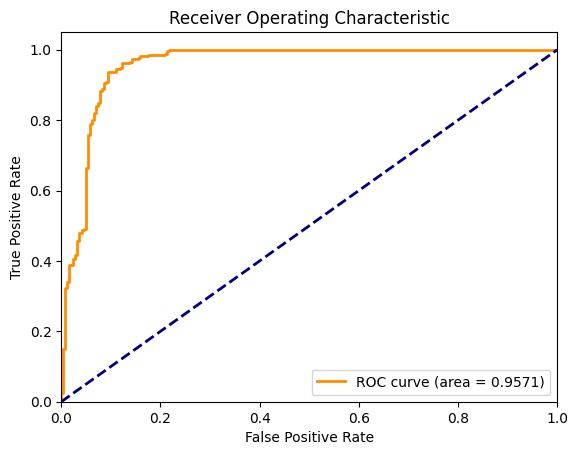

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
y_pred_proba = eclf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Logistic Regression Model

In [ ]:
LR=LogisticRegression(max_iter=1000)

rfe = RFE(estimator=LR, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, y_train)
y_pred=rfe.predict(X_test)

### Metrics calculation

              precision    recall  f1-score   support

           0     0.9417    0.8571    0.8974       245
           1     0.9304    0.9730    0.9512       481

    accuracy                         0.9339       726
   macro avg     0.9361    0.9151    0.9243       726
weighted avg     0.9342    0.9339    0.9331       726



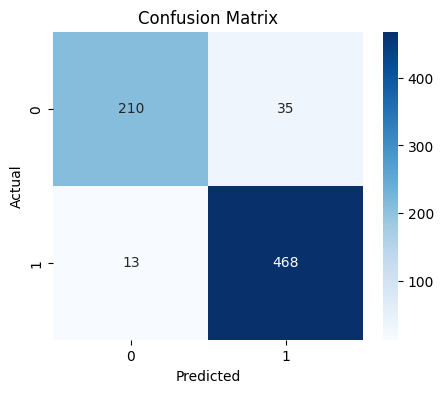

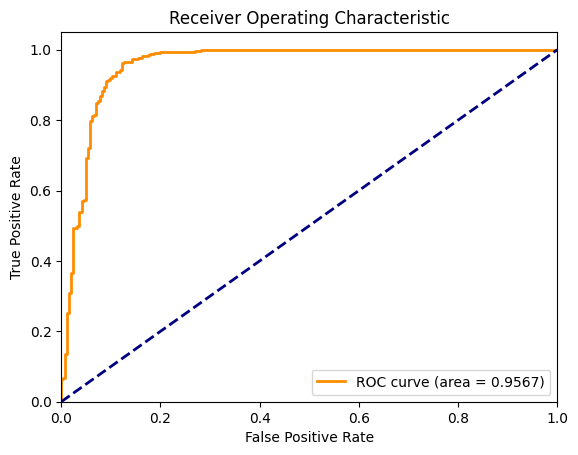

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
y_pred_proba = rfe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Random Forest implementation

In [ ]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
rf_3 = RandomForestClassifier()
rfe = RFE(estimator=rf_3, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, y_train)
y_pred=rfe.predict(X_test)

              precision    recall  f1-score   support

           0     0.9321    0.8408    0.8841       245
           1     0.9228    0.9688    0.9452       481

    accuracy                         0.9256       726
   macro avg     0.9274    0.9048    0.9147       726
weighted avg     0.9259    0.9256    0.9246       726



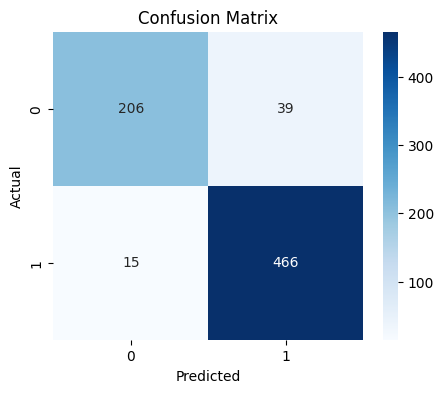

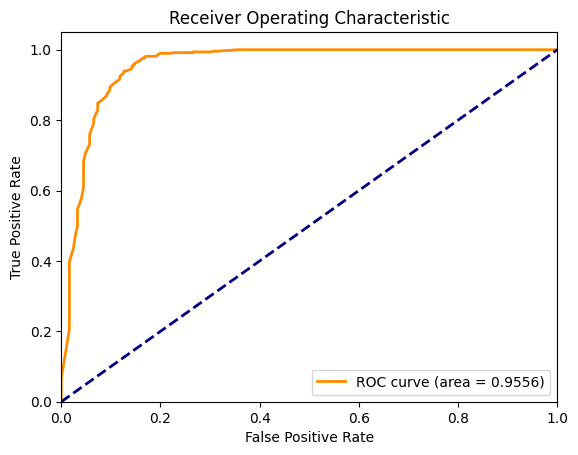

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
y_pred_proba = rfe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## XGBoost Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

rfe = RFE(estimator=xgb, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, y_train)
y_pred=rfe.predict(X_test)



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:34:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:34:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:34:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:34:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:34:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarn

              precision    recall  f1-score   support

           0     0.9455    0.8490    0.8946       245
           1     0.9269    0.9751    0.9504       481

    accuracy                         0.9325       726
   macro avg     0.9362    0.9120    0.9225       726
weighted avg     0.9331    0.9325    0.9315       726



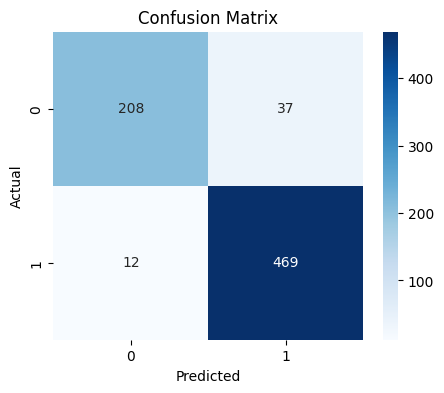

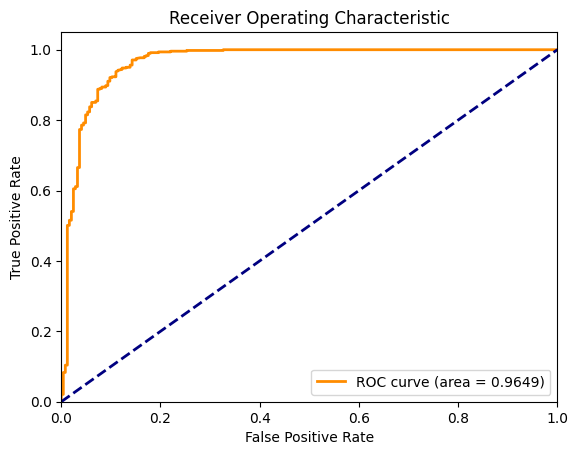

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
y_pred_proba = rfe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
GBC=GradientBoostingClassifier()

rfe = RFE(estimator=GBC, step=1)
rfe = rfe.fit(X_train, y_train)
y_pred=rfe.predict(X_test)

              precision    recall  f1-score   support

           0     0.9455    0.8490    0.8946       245
           1     0.9269    0.9751    0.9504       481

    accuracy                         0.9325       726
   macro avg     0.9362    0.9120    0.9225       726
weighted avg     0.9331    0.9325    0.9315       726



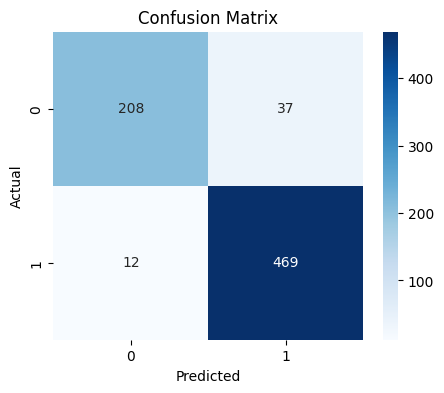

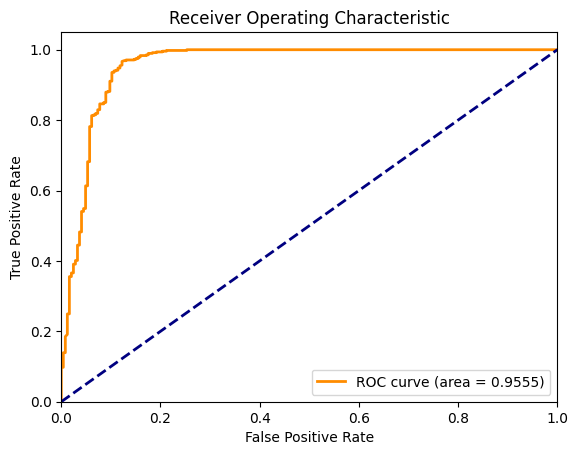

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
y_pred_proba = rfe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Linear_SGD classifier

In [ ]:
# Implementing Linear_SGD classifier

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000, loss='log_loss') # Change loss to 'log_loss' for probability estimates
rfe = RFE(estimator=clf, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, y_train)
y_pred=rfe.predict(X_test)


              precision    recall  f1-score   support

           0     0.8936    0.8571    0.8750       245
           1     0.9287    0.9480    0.9383       481

    accuracy                         0.9174       726
   macro avg     0.9112    0.9026    0.9066       726
weighted avg     0.9169    0.9174    0.9169       726



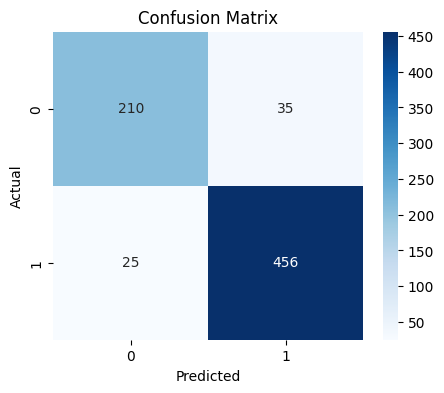

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

# define the base models
level0 = list()
level0.append(('LR', LogisticRegression(C= 0.1, penalty='l2')))
level0.append(('RF',RandomForestClassifier(n_estimators= 300)))
level0.append(('SGD',SGDClassifier(alpha= 0.01)))
level0.append(('XGB',XGBClassifier(subsample= 0.8, min_child_weight= 5, max_depth= 5, gamma= 1, colsample_bytree= 0.8)))
level0.append(('MLP',MLPClassifier(activation= 'relu', alpha= 0.0001, hidden_layer_sizes= (20,), learning_rate= 'adaptive', solver= 'adam')))
level0.append(('Adaboost',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter= 'random'))))
level0.append(('bagging',BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=2, splitter= 'random'))))

# define meta learner model
level1= SVC(C= 0.7999999999999999, gamma= 0.04, kernel= 'rbf')
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) r

              precision    recall  f1-score   support

           0     0.9498    0.8490    0.8966       245
           1     0.9270    0.9771    0.9514       481

    accuracy                         0.9339       726
   macro avg     0.9384    0.9131    0.9240       726
weighted avg     0.9347    0.9339    0.9329       726



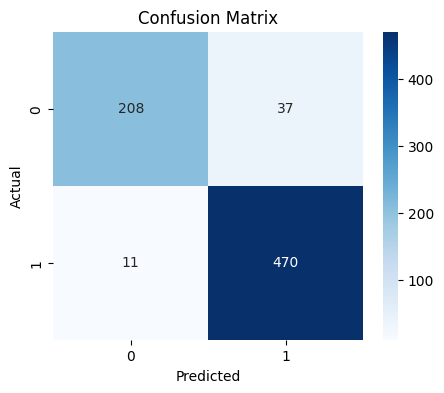

In [ ]:
# Need to print the classiiofcation report , confusion matrix using heatmap

import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred,digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
